In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [85]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [86]:
data['Rings'].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24])

In [87]:
print(data.Sex.value_counts())

M    1528
I    1342
F    1307
Name: Sex, dtype: int64


As the rings are given in integers and they are so many values hence the problem is of regression and not of classification. Now, i will encode the Sex variable so that i can take into machine learning.

In [88]:
from sklearn.preprocessing import LabelEncoder

In [89]:
LE = LabelEncoder()

data['Sex_encoded'] = LE.fit_transform(data['Sex'])
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_encoded
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,2
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,2
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,2
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,1
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,0
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,2
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,2
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,0


In [90]:
data.drop('Sex',axis=1,inplace=True)
data

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_encoded
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,2
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,2
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,2
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,1
...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,2
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,2
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,0


In [91]:
data.dtypes

Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
Sex_encoded         int64
dtype: object

As I have already converted sex variable into categorical, now there are no variable called object.

In [92]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_encoded
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,1.052909
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,0.822240
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,0.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,0.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,1.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,2.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,2.000000


1. From Count, i can see that there are no missing value in there dataset.
2. Mean and median in most of the variables, are not much far from each other. Eventhough they seem to be right skwed. I will check the outliers with the help of z score and try to remove them to remove the skewness.
3. The values in each variables do not have big gaps which needs us to use scaler.

2    1528
1    1342
0    1307
Name: Sex_encoded, dtype: int64


<AxesSubplot:xlabel='Sex_encoded', ylabel='count'>

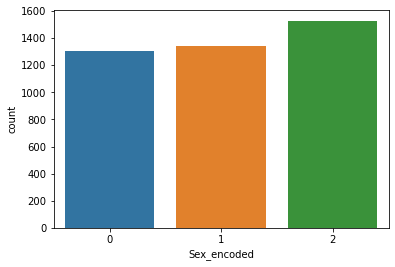

In [93]:
print(data.Sex_encoded.value_counts())
sns.countplot(x="Sex_encoded", data=data)

In [94]:
data.Rings.value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

<AxesSubplot:xlabel='Length', ylabel='Density'>

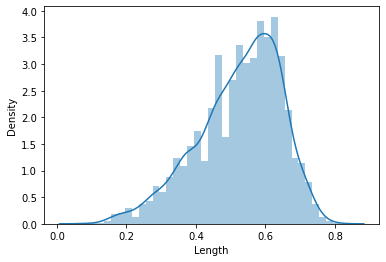

In [95]:
sns.distplot(data['Length'])

<AxesSubplot:xlabel='Diameter', ylabel='Density'>

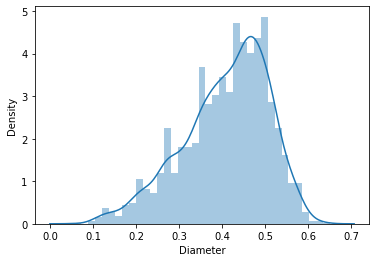

In [96]:
sns.distplot(data['Diameter'])

<AxesSubplot:xlabel='Height', ylabel='Density'>

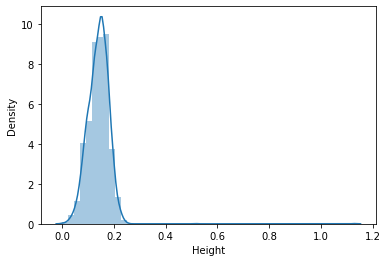

In [97]:
sns.distplot(data['Height'])

<AxesSubplot:xlabel='Whole weight', ylabel='Density'>

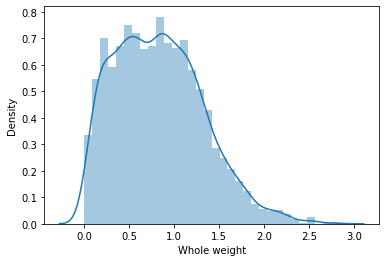

In [98]:
sns.distplot(data['Whole weight'])

<AxesSubplot:xlabel='Shucked weight', ylabel='Density'>

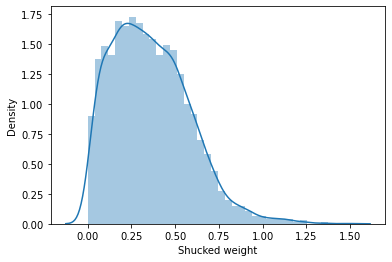

In [99]:
sns.distplot(data['Shucked weight'])

<AxesSubplot:xlabel='Viscera weight', ylabel='Density'>

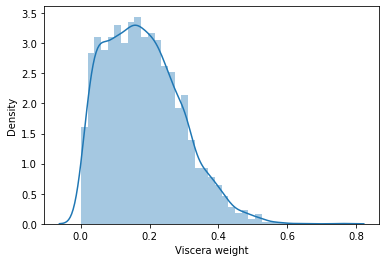

In [100]:
sns.distplot(data['Viscera weight'])

<AxesSubplot:xlabel='Shell weight', ylabel='Density'>

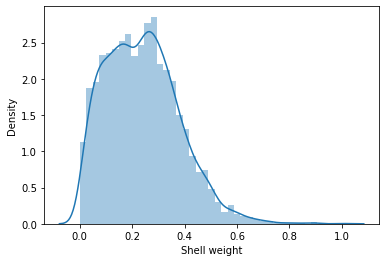

In [101]:
sns.distplot(data['Shell weight'])

In [102]:
data.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
Sex_encoded      -0.098155
dtype: float64

As I can see that there is skewness in most of the variables, hence With the help of Z score I will remove outliers.

In [103]:
from scipy.stats import zscore
z=np.abs(zscore(data))
z

threshold=3
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

In [104]:
data_new=data[(z<3).all(axis=1)]
data_new


data_new

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_encoded
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,2
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,2
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,2
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,1
...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,2
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,2
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,0


By removing outlier the i will loose 3.5% data which i think is acceptable. Hence new dataset will have 4027 rows and 9 columns.

In [105]:
data_new.skew()

Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
Rings             0.725464
Sex_encoded      -0.094886
dtype: float64

After removing outliers, I got rid of skewness in Height, Whole weight, Shucked weight, Viscera weight,  and Shell weight. 

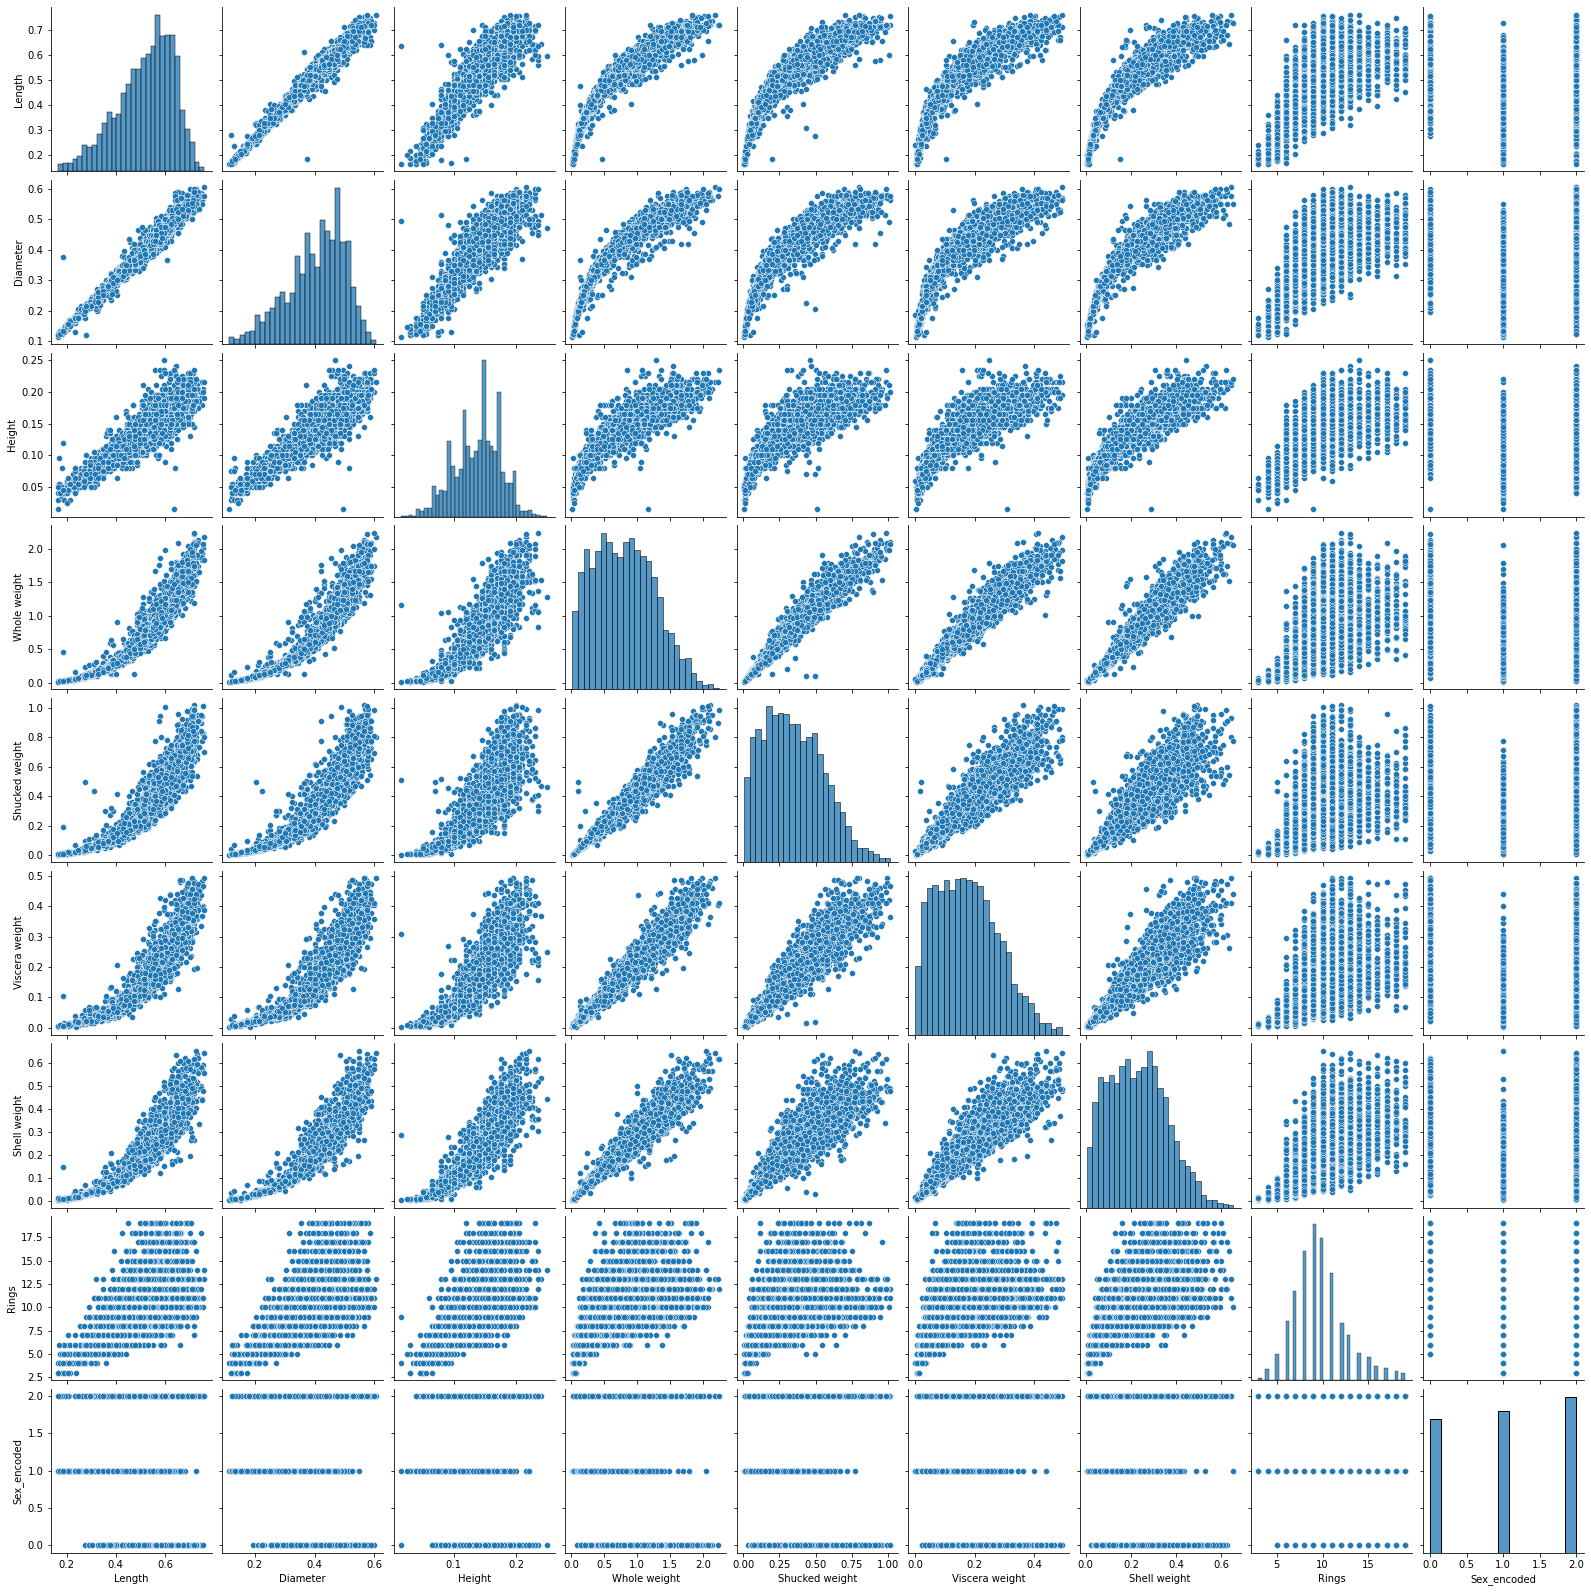

In [106]:
sns.pairplot(data_new)

In [107]:
correlation = data_new.corr()
correlation

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_encoded
Length,1.000000,0.986011,0.895432,0.934410,0.909245,0.907957,0.914518,0.567074,-0.043639
Diameter,0.986011,1.000000,0.901803,0.934069,0.904302,0.904192,0.921779,0.584978,-0.046531
Height,0.895432,0.901803,1.000000,0.891783,0.843010,0.869273,0.899716,0.612540,-0.046282
Whole weight,0.934410,0.934069,0.891783,1.000000,0.971024,0.966612,0.961216,0.548295,-0.034776
Shucked weight,0.909245,0.904302,0.843010,0.971024,1.000000,0.930154,0.896220,0.440424,-0.016457
Viscera weight,0.907957,0.904192,0.869273,0.966612,0.930154,1.000000,0.919414,0.522917,-0.045292
Shell weight,0.914518,0.921779,0.899716,0.961216,0.896220,0.919414,1.000000,0.622872,-0.043825
Rings,0.567074,0.584978,0.612540,0.548295,0.440424,0.522917,0.622872,1.000000,-0.033272
Sex_encoded,-0.043639,-0.046531,-0.046282,-0.034776,-0.016457,-0.045292,-0.043825,-0.033272,1.000000


<AxesSubplot:>

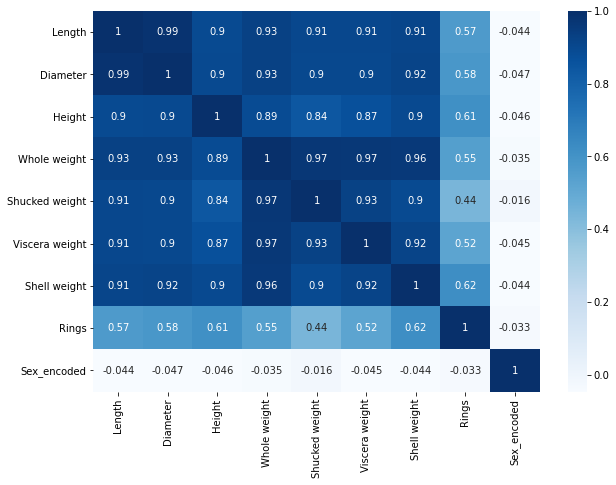

In [108]:
plt.figure(figsize=(10,7))
sns.heatmap(correlation, annot=True, cmap='Blues')

From pair plot and  heatmap I can say that there are so many predictors have very high collinearity. With the help of normalise function I will try to address this problem. Even after that there is a problem of multicollinearity then I have to Continue with the same variables.

In [109]:
y = data_new.iloc[:,-2]
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4027, dtype: int64

I separated target variable from main data.

In [110]:
dep = data_new.drop(['Rings'], axis=1)
dep

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_encoded
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,2
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,2
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,2
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,1
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,2
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,2
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,0


In [111]:
dep = data_new.drop(['Rings'], axis=1)
dep

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_encoded
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,2
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,2
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,2
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,1
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,2
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,2
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,0


I dropped target variable from data set so that I can send rest of the data for normalisation.

In [112]:
from sklearn import preprocessing
X = preprocessing.normalize(dep)
X

array([[0.20995242, 0.16842337, 0.04383622, ..., 0.04660482, 0.06921508,
        0.9228678 ],
       [0.16940013, 0.1282601 , 0.04356003, ..., 0.02347402, 0.03388003,
        0.96800072],
       [0.51386887, 0.40721684, 0.13089113, ..., 0.13719329, 0.20360842,
        0.        ],
       ...,
       [0.23598838, 0.18682413, 0.08062936, ..., 0.11307776, 0.1211407 ,
        0.78662793],
       [0.41355572, 0.32091924, 0.09925337, ..., 0.17270087, 0.19585999,
        0.        ],
       [0.22533949, 0.17614566, 0.06188902, ..., 0.11949341, 0.15710289,
        0.63475913]])

In [113]:
x = pd.DataFrame(X)
x

,0,1,2,3,4,5,6,7
0,0.209952,0.168423,0.043836,0.237177,0.103592,0.046605,0.069215,0.922868
1,0.169400,0.128260,0.043560,0.109142,0.048158,0.023474,0.033880,0.968001
2,0.513869,0.407217,0.130891,0.656395,0.248693,0.137193,0.203608,0.000000
3,0.203126,0.168502,0.057706,0.238212,0.099486,0.052628,0.071556,0.923301
4,0.296955,0.229465,0.071989,0.184472,0.080538,0.035545,0.049492,0.899862
...,...,...,...,...,...,...,...,...
4022,0.447829,0.356678,0.130782,0.703052,0.293269,0.189436,0.197362,0.000000
4023,0.244991,0.182705,0.056057,0.401121,0.182290,0.089069,0.108170,0.830478
4024,0.235988,0.186824,0.080629,0.462537,0.206686,0.113078,0.121141,0.786628
4025,0.413556,0.320919,0.099253,0.724219,0.351357,0.172701,0.195860,0.000000


In [114]:
coi = x.corr()
coi

,0,1,2,3,4,5,6,7
0,1.000000,0.990415,0.927928,0.521259,0.471208,0.506416,0.554708,-0.751562
1,0.990415,1.000000,0.933206,0.560378,0.505462,0.541084,0.597037,-0.775571
2,0.927928,0.933206,1.000000,0.571400,0.497388,0.557098,0.620824,-0.768167
3,0.521259,0.560378,0.571400,1.000000,0.955140,0.952880,0.947139,-0.874238
4,0.471208,0.505462,0.497388,0.955140,1.000000,0.896400,0.851490,-0.818803
5,0.506416,0.541084,0.557098,0.952880,0.896400,1.000000,0.889038,-0.845444
6,0.554708,0.597037,0.620824,0.947139,0.851490,0.889038,1.000000,-0.852474
7,-0.751562,-0.775571,-0.768167,-0.874238,-0.818803,-0.845444,-0.852474,1.000000


<AxesSubplot:>

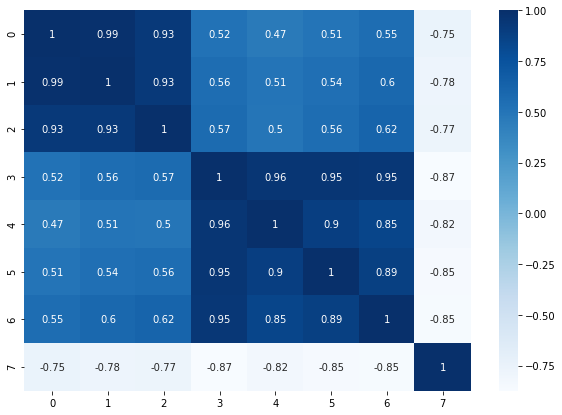

In [115]:
plt.figure(figsize=(10,7))
sns.heatmap(coi, annot=True, cmap='Blues')

Even after normalizing the data, still some of the variables have the multicolinearity and I have only 8 predictors. Hence, instead of dropping more columns, i will use them to build model.

In [116]:
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
maxscore=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=i)
    mod = LinearRegression()
    mod.fit(x_train,y_train)
    pred = mod.predict(x_test)
    r2score = r2_score(y_test,pred)
    if r2score>maxscore:
        maxscore=r2score
        maxRS=i
print("Best r2 score is ", maxscore, 'on Random state ', maxRS)

Best r2 score is  0.5356162169726854 on Random state  82


In [117]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=82)

In [118]:
x_train.shape

(2818, 8)

In [119]:
y_train.shape

(2818,)

In [120]:
x_test.shape

(1209, 8)

In [121]:
y_test.shape

(1209,)

In [122]:
from sklearn.metrics import mean_squared_error
model=[LinearRegression(),KNeighborsRegressor(), DecisionTreeRegressor(), SVR(), RandomForestRegressor()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    m_pred=m.predict(x_test)
    r2sscore = r2_score(y_test,m_pred)
    MSE= mean_squared_error(y_test,m_pred)
    
    print(m)
    print(m.score(x_train,y_train))
    print('R2 score for :', m, 'is', r2sscore)
    print('Mean Squared Error for ', m ,"is:" ,MSE)
    print("\n")

LinearRegression()
0.4752927662190457
R2 score for : LinearRegression() is 0.5356162169726854
Mean Squared Error for  LinearRegression() is: 3.990532821690658


KNeighborsRegressor()
0.6565215650338165
R2 score for : KNeighborsRegressor() is 0.5323622636894783
Mean Squared Error for  KNeighborsRegressor() is: 4.018494623655914


DecisionTreeRegressor()
1.0
R2 score for : DecisionTreeRegressor() is 0.21071525417089754
Mean Squared Error for  DecisionTreeRegressor() is: 6.782464846980976


SVR()
0.47428491046000987
R2 score for : SVR() is 0.5141514084694777
Mean Squared Error for  SVR() is: 4.17498375640023


RandomForestRegressor()
0.9324388936494155
R2 score for : RandomForestRegressor() is 0.5418434215682418
Mean Squared Error for  RandomForestRegressor() is: 3.9370213399503724




In [123]:
from sklearn.model_selection import KFold
kfold=KFold(5)
score=cross_val_score(LinearRegression(),x,y,cv=kfold)
print(score.mean())

0.39805114954282816


In [124]:
score=cross_val_score(KNeighborsRegressor(),x,y,cv=kfold)
print(score.mean())

0.4240967860564516


In [125]:
score=cross_val_score(DecisionTreeRegressor(),x,y,cv=kfold)
print(score.mean())

-0.0657145731645529


In [126]:
score=cross_val_score(SVR(),x,y,cv=kfold)
print(score.mean())

0.44343915109373067


In [127]:
score=cross_val_score(RandomForestRegressor(),x,y,cv=kfold)
print(score.mean())

0.45363489379661176


When I compared CV score with or R2 score I found that SVR is the best learning algorithm for this data. Now I will continue with hyper parameter tuning for SVR.

In [133]:
parameter = {'gamma' : [1,0.1,0.01,0.001],
            'kernel' : ['poly', 'rbf', 'sigmoid'],
            'verbose':[True, False],
            'C': [0.1,1, 10, 100]}

In [ ]:
#GSV = GridSearchCV(SVR(),parameter,cv=10)
#GSV.fit(x_train,y_train)

In [130]:
GSV.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'rbf', 'verbose': True}

In [131]:
Final_Model = SVR(C= 100, gamma= 1, kernel='rbf',verbose=True)
Final_Model.fit(x_train,y_train)
Final_Model.score(x_train,y_train)
model_pred=Final_Model.predict(x_test)
r2score = r2_score(y_test,model_pred)
MSE= mean_squared_error(y_test,model_pred)


print(Final_Model.score(x_train,y_train))
print('R2 score is :',r2score)
print('Mean Squared Error is ',MSE) 

[LibSVM]0.5344191747085074
R2 score is : 0.5744108188629513
Mean Squared Error is  3.657163875991659


Finally the model is built with the best parameters and now I will save the model using joblib library.

In [132]:
import joblib
joblib.dump(Final_Model,'abalone.obj')

['abalone.obj']